<a href="https://colab.research.google.com/github/Ktembhurne/DL/blob/main/Regression_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression With Keras



### Step 1: Read the data

```
# This is formatted as code
```



In [ ]:
import pandas as pd
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Target feature here is PE (power plant energy output)*italicized text*

### Step 2 : Besic data quelity chack

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [ ]:
df.duplicated().sum()

41

In [ ]:
df.duplicated().sum()/len(df)

0.004285117056856187

### Step 3: Seperate X and Y(PE)

In [ ]:
X = df.drop(columns=['PE'])
Y = df[["PE"]]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


### Step 4: Create a Preprocessing Pipeline for X

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [ ]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.517862,-1.065205,-0.407357,1.143944
1,0.535255,0.329277,-0.313057,0.061031
2,1.353818,0.204151,-1.028729,-2.150688
3,-0.077996,-0.363242,-1.016941,0.238434
4,-1.053562,-1.073861,0.651838,1.636427


### Step 5: Apply train test split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5487,0.749961,0.721180,-0.329896,-0.486248
3522,0.864023,1.266539,-0.984946,0.826125
6916,0.936486,1.524659,0.318419,0.809686
7544,1.665141,1.380647,-0.902434,-1.155449
7600,1.214260,1.364121,-1.035464,-0.236924


In [ ]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [ ]:
xtest.head()

,AT,V,AP,RH
2513,1.348451,0.239564,-1.284687,-1.093118
9411,0.813030,1.364121,-0.742460,0.274052
8745,-0.244392,-0.738619,1.983830,-0.186923
9085,-1.367568,-1.015627,2.276835,0.977500
4950,1.375289,0.825058,0.613107,-1.717111


In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


### Step 5: Build the Keras neural network

![image.png](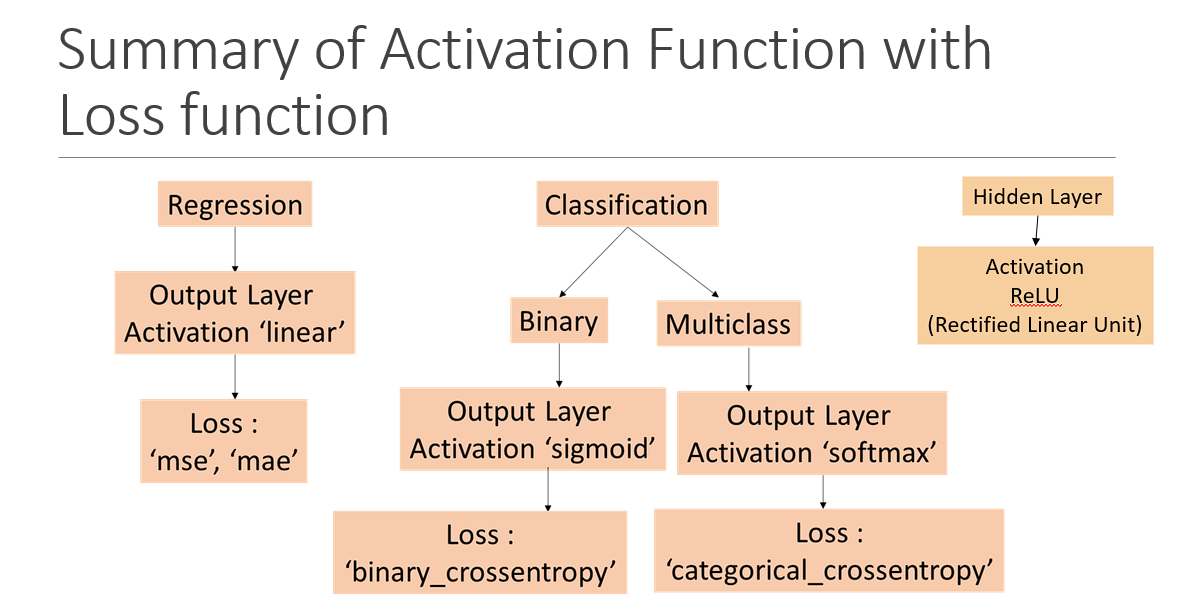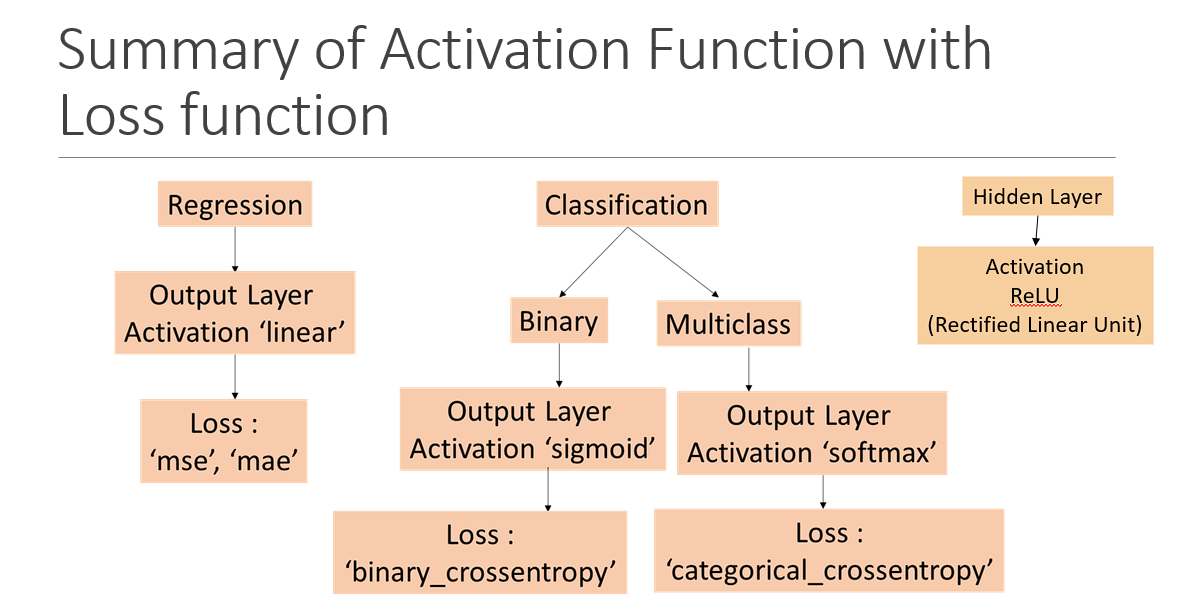)

In [ ]:
xtrain.shape[1]

4

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input

In [ ]:

# Intialialize the sequential model
model = Sequential()

# Add the input layer
model.add(Input(shape=(xtrain.shape[1],)))
# Add the Hidden Layer 1
model.add(Dense(units=8, activation='relu'))
# Add the Hidden Layer 2
model.add(Dense(units=4, activation='relu'))
# Add the output Layer
model.add(Dense(units=1, activation='linear'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

In [ ]:
hist = model.fit(xtrain, ytrain, validation_split=0.2, epochs=100)

Epoch 1/100
192/192 [==============================] - 3s 4ms/step - loss: 206501.3750 - mae: 454.0995 - val_loss: 204908.9219 - val_mae: 452.3362
Epoch 2/100
192/192 [==============================] - 0s 2ms/step - loss: 203044.8750 - mae: 450.2629 - val_loss: 198361.8281 - val_mae: 445.0359
Epoch 3/100
192/192 [==============================] - 0s 2ms/step - loss: 190592.7812 - mae: 436.1944 - val_loss: 178544.5312 - val_mae: 422.2245
Epoch 4/100
192/192 [==============================] - 0s 2ms/step - loss: 162012.2969 - mae: 401.7885 - val_loss: 141990.2031 - val_mae: 375.9367
Epoch 5/100
192/192 [==============================] - 0s 3ms/step - loss: 119919.9219 - mae: 343.7676 - val_loss: 97120.8750 - val_mae: 307.6038
Epoch 6/100
192/192 [==============================] - 0s 2ms/step - loss: 76474.7812 - mae: 267.8633 - val_loss: 58114.8672 - val_mae: 227.4220
Epoch 7/100
192/192 [==============================] - 0s 2ms/step - loss: 44460.3242 - mae: 191.0759 - val_loss: 34310.5

### Evaluate the model in train and test

In [ ]:
model.evaluate(xtrain, ytrain)

240/240 [==============================] - 1s 4ms/step - loss: 20.7361 - mae: 3.5542


[20.736116409301758, 3.5542192459106445]

In [ ]:
model.evaluate(xtest, ytest)

60/60 [==============================] - 0s 7ms/step - loss: 19.1315 - mae: 3.4127


[19.131498336791992, 3.4126741886138916]

## Plot The Learning Curve

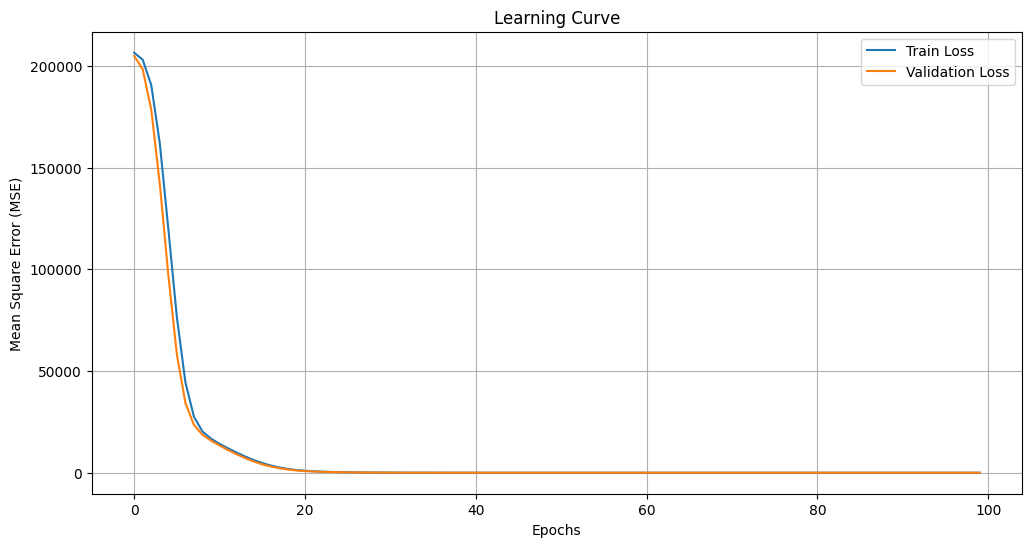

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Square Error (MSE)')
plt.title('Learning Curve')
plt.legend()
plt.grid()
plt.show()

## Predict The results For train And test

In [ ]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [ ]:
ypred_train[0:5]

array([[441.44937],
       [433.2238 ],
       [433.38104],
       [427.9219 ],
       [430.14377]], dtype=float32)

In [ ]:
ytrain.head()

,PE
5487,442.75
3522,432.52
6916,428.80
7544,426.07
7600,436.58


In [ ]:
ypred_test[0:5]

array([[434.42734],
       [435.32785],
       [461.25284],
       [477.67303],
       [434.95026]], dtype=float32)

In [ ]:
ytest.head()

,PE
2513,433.27
9411,438.16
8745,458.42
9085,480.82
4950,441.41


## Perform detailed evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
def evaluate_model(model, x, y):
  ypred = model.predict(x)
  mse = mean_squared_error(y, ypred)
  rmse = mse**(1/2)
  mae = mean_absolute_error(y, ypred)
  r2 = r2_score(y, ypred)
  print(f'Mean Squared Error : {mse:.2f}')
  print(f'Root Mean Squared Error : {rmse:.2f}')
  print(f'Mean Absolute Error : {mae:.2f}')
  print(f'R2 score : {r2:.4f}')

In [ ]:
evaluate_model(model, xtrain, ytrain)

240/240 [==============================] - 1s 3ms/step
Mean Squared Error : 20.74
Root Mean Squared Error : 4.55
Mean Absolute Error : 3.55
R2 score : 0.9291


In [ ]:
evaluate_model(model, xtest, ytest)

60/60 [==============================] - 0s 3ms/step
Mean Squared Error : 19.13
Root Mean Squared Error : 4.37
Mean Absolute Error : 3.41
R2 score : 0.9331


## R2 score in test is 0.9336 > 0.8 hence above model is very good

### Saving above model (.keras)

In [ ]:
model.save('PowerOutput.keras')

## Load the above model

In [ ]:
from keras.models import load_model

In [ ]:
m = load_model('/content/PowerOutput.keras')

In [ ]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
m.weights

[<tf.Variable 'dense/kernel:0' shape=(4, 8) dtype=float32, numpy=
 array([[ 0.7558646 , -0.15298998, -0.51243347, -0.4593872 ,  1.1854447 ,
          0.12754712, -0.4579029 , -1.0809747 ],
        [ 1.1019651 ,  0.9930682 , -0.6466485 , -0.7513371 ,  0.6979651 ,
         -1.1522326 ,  0.5355473 , -0.8756987 ],
        [ 0.29954597, -0.6073053 ,  0.67994326, -0.5463296 ,  0.23008667,
          0.76342213, -0.88224226,  0.37812367],
        [ 0.23993453, -0.85798705, -0.22519487,  0.43907714, -0.38205984,
         -0.5519237 ,  0.9400333 ,  0.03777063]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(8,) dtype=float32, numpy=
 array([3.32363  , 3.7401166, 3.6003175, 3.5673485, 3.79527  , 3.7567666,
        3.5417697, 3.2540724], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(8, 4) dtype=float32, numpy=
 array([[ 2.3824122 ,  2.1811848 ,  0.01894316,  0.29251033],
        [ 2.2598116 ,  2.8061297 , -0.5431864 ,  0.06801015],
        [ 2.803197  ,  2.9161189 , -0.09690653, 